### Libraries

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# mlxtend library taken from : https://github.com/rasbt
# Mr. Sebastian Raschka, Author of Python Machine Learning


### Reading the Data

In [2]:
df = pd.read_excel('C:/Users/desai/Google Drive/1_USA/1_UTD/1_Systems Enggineering and Management/Skills/Competition/data_science_analytics_2018_data.xlsx', sheetname='data')

### Data

In [91]:
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
1,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
2,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
3,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
4,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
5,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
6,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
7,C581470,23084,RABBIT NIGHT LIGHT,-4,2011-12-08 19:28:00,2.08,17924.0,United Kingdom
8,C581468,21314,SMALL GLASS HEART TRINKET POT,-10,2011-12-08 19:26:00,2.10,13599.0,United Kingdom
9,C581468,22098,BOUDOIR SQUARE TISSUE BOX,-12,2011-12-08 19:26:00,0.39,13599.0,United Kingdom


### Data Description

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts                    with letter 'c', it indicates a cancellation. 

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

Description: Product (item) name. Nominal. 

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated. 

UnitPrice: Unit price. Numeric, Product price per unit in sterling. 

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

Country: Country name. Nominal, the name of the country where each customer resides.


### List of errors
1. Missing values in Description, CustomerID [No other col has missing values]
2. Errors in StockCode (wrong numbering, originally nominal 5 digit code)
3. Errors in InvoiceNo
3. Error in UnitPrice. Shows 0.
4. Country; unspecified etc

### Data Exploration

In [3]:
df.count()
# there are missing values in 
#    1. Description
#    2. CustomerID 

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

Let's Visualize the missing values in our data.

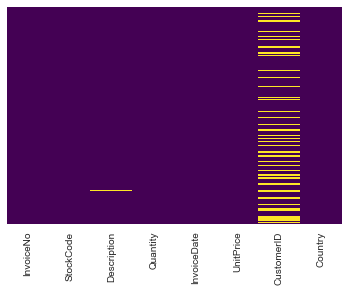

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df[df['Description'].isnull()].count()['InvoiceNo']
# there are 1454 error values in description. What have they purchased??

1454

In [6]:
df[df['Description'].isnull()]
# It's all NaN

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
12606,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom
14160,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
15793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
15799,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
15803,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
17389,581103,22689,NaN,4,2011-12-07 11:58:00,0.0,NaN,United Kingdom
17390,581102,21803,NaN,20,2011-12-07 11:57:00,0.0,NaN,United Kingdom
21333,580743,47591B,NaN,1,2011-12-06 09:30:00,0.0,NaN,United Kingdom
26495,580588,21808,NaN,5,2011-12-05 10:35:00,0.0,NaN,United Kingdom
26497,580580,21804,NaN,10,2011-12-05 10:33:00,0.0,NaN,United Kingdom


Investigating a little on NaN Description values by creating its own dataframe.

In [17]:
df_null_desc = df[df['Description'].isnull()]

In [18]:
df_null_desc['UnitPrice'].value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

In [19]:
df_null_desc[df_null_desc['UnitPrice']==0]
## an important insight. The records where Desciption is NaN, UnitPrice is Zero. 
## Let me just once see what's under CustomerID for these rows. 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
12606,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom
14160,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
15793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
15799,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
15803,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
17389,581103,22689,NaN,4,2011-12-07 11:58:00,0.0,NaN,United Kingdom
17390,581102,21803,NaN,20,2011-12-07 11:57:00,0.0,NaN,United Kingdom
21333,580743,47591B,NaN,1,2011-12-06 09:30:00,0.0,NaN,United Kingdom
26495,580588,21808,NaN,5,2011-12-05 10:35:00,0.0,NaN,United Kingdom
26497,580580,21804,NaN,10,2011-12-05 10:33:00,0.0,NaN,United Kingdom


In [20]:
df_null_desc['CustomerID'].unique()
# Another important insight that the CustomerID field for the NULL description records is also NULL. 
## May be I will drop all these rows. 
## There is no useful data in these records. The loss of records anyways is just 1454 out of 541909 records. Pretty OK with it.

array([ nan])

The records where description is null has:
    1. zero unit price value
    2. Null CustomerId
    
Thus, deleting these records which are providing no information.    

In [7]:
### Deleting the above rows mentioned
df_1 = df.dropna(subset=['Description'], how='all')
df_1.count()

InvoiceNo      540455
StockCode      540455
Description    540455
Quantity       540455
InvoiceDate    540455
UnitPrice      540455
CustomerID     406829
Country        540455
dtype: int64

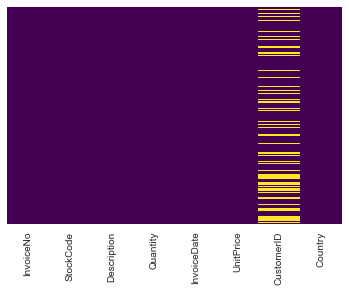

In [8]:
# Again visualizing the missing values.
sns.heatmap(df_1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### So the 'Description' problem is solved. We have now 540455 records and updated 'df_1'. 


### Next issue with the data is that we have lots of missing CustomerId values. For the Market Basket Analysis, we do not require CustomerId. 

In [9]:
df_1[df_1['CustomerID'].isnull()].count()['InvoiceNo']
# Damn, large missing values. 133,626 missing values in such an important variable "CustomerID".
# A probable reason for the null values might be that while purchasing, the customers did not use the Loyalty/Customer Card and 
# thus their identity is not recorded

133626

## Market Basket Analysis

In [4]:
df_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
1,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
2,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
3,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
4,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom


### Removing the items where the decsription is Manual.

In [11]:
df_1[(df_1['Description']=='Manual')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
86,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
102,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
230,C580510,M,Manual,-1,2011-12-04 13:48:00,1.25,14456.0,United Kingdom
254,C580263,M,Manual,-4,2011-12-02 12:43:00,9.95,12536.0,France


In [12]:
df_1.drop(df_1[(df_1['Description']=='Manual')].index, inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### DataPrep I:  I will remove all the transactions that were cancelled and would work on purchased products for the Analysis.

In [14]:
df_2 = df_1[df_1['Quantity']>0]

In [5]:
df_2['InvoiceNo'].count()
# The dataset has 530,693 [half-million] records.

530693

In [251]:
df_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9288,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
9289,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
9290,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
9291,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
9292,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France


### DataPrep II: Dealing with the "Adjusted Invoices"

In [252]:
df_2['InvoiceNo'] = df_2['InvoiceNo'].astype('str')

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [253]:
df_2[df_2['InvoiceNo'].str.contains('A')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9288,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
9289,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
9290,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


In [254]:
# Deleting the above columns which are not a part of purchase.
df_2.drop([9288,9289,9290], inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Removing Packing charges

In [268]:
df_2[df_2['Description'].str.contains('PACKING')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
17828,581022,23574,PACKING CHARGE,1,2011-12-07 10:25:00,7.5,12826.0,United Kingdom
54904,578318,23574,PACKING CHARGE,1,2011-11-23 16:48:00,7.5,17135.0,United Kingdom
93912,575682,23574,PACKING CHARGE,1,2011-11-10 15:37:00,7.5,12826.0,United Kingdom
116030,573994,23574,PACKING CHARGE,1,2011-11-02 11:23:00,7.5,17135.0,United Kingdom
116246,573931,23574,PACKING CHARGE,1,2011-11-02 10:16:00,7.5,16884.0,United Kingdom
116953,573895,23574,PACKING CHARGE,1,2011-11-01 14:01:00,7.5,15423.0,United Kingdom
145798,571641,23574,PACKING CHARGE,1,2011-10-18 12:07:00,7.5,17135.0,United Kingdom
179606,569003,23574,PACKING CHARGE,1,2011-09-29 18:13:00,7.5,13364.0,United Kingdom
181525,568805,23574,PACKING CHARGE,1,2011-09-29 10:55:00,7.5,12826.0,United Kingdom
193071,567913,23574,PACKING CHARGE,1,2011-09-22 17:08:00,7.5,18144.0,United Kingdom


In [16]:
df_2.drop(df_2[df_2['Description'].str.contains('PACKING')].index, inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### DataPrep III: Removing the postages from the transactions

In [270]:
df_2[df_2['Description'].str.contains('POST')].index
# There are 1126 transactions which are not useful for the analysis.

Int64Index([  9427,   9431,   9444,   9481,   9872,   9996,  10013,  10744,
             11143,  11826,
            ...
            538149, 539282, 539348, 539473, 540381, 540477, 540809, 540810,
            541532, 541882],
           dtype='int64', length=2541)

In [271]:
df_2.drop(df_2[df_2['Description'].str.contains('POST')].index, inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### DataPrep IV: Cleaning up "Description Column"

### i) There are records which are gifts given to customers. I will be removing those records

In [22]:
df_2[df_2['Description'].str.contains('gift')].head()
# 32 records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15746,581217,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-12-08 09:20:00,8.33,NaN,United Kingdom
119526,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-10-31 14:41:00,16.67,NaN,United Kingdom
225602,565231,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-09-02 09:26:00,25.00,NaN,United Kingdom
227506,564974,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,2,2011-08-31 15:32:00,8.33,NaN,United Kingdom
230323,564760,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-08-30 10:47:00,8.33,NaN,United Kingdom


In [24]:
df_2.drop(df_2[df_2['Description'].str.contains('gift')].index, inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### ii) I have noticed that, the descriptions written in lower cases are not actual product purchases. These are internal remarks/comments made during the transactions.

In [277]:
# These are the records.
df_2[df_2['Description'].str.islower()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15791,581211,22142,check,14,2011-12-07 18:36:00,0.0,NaN,United Kingdom
15800,581202,23404,check,41,2011-12-07 18:30:00,0.0,NaN,United Kingdom
26496,580586,21804,dotcom,4,2011-12-05 10:34:00,0.0,NaN,United Kingdom
26595,580549,84876B,found,66,2011-12-05 09:54:00,0.0,NaN,United Kingdom
28808,580376,22606,check,8,2011-12-02 17:49:00,0.0,NaN,United Kingdom
34631,579879,22759,check,17,2011-11-30 17:13:00,0.0,NaN,United Kingdom
34632,579873,35819B,check,18,2011-11-30 17:00:00,0.0,NaN,United Kingdom
36590,579680,22533,check,60,2011-11-30 13:29:00,0.0,NaN,United Kingdom
36980,579563,85135C,found,36,2011-11-30 11:41:00,0.0,NaN,United Kingdom
41914,579275,22176,amazon,1,2011-11-29 10:02:00,0.0,NaN,United Kingdom


In [27]:
df_2.drop(df_2[df_2['Description'].str.islower()].index, inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### iii) Cleaning amazon fee

In [32]:
df_2[df_2['Description'].str.contains('AMAZON')].head()
# 5 records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
31571,580145,22925,AMAZON,1,2011-12-02 10:03:00,0.00,NaN,United Kingdom
47077,578930,22848,AMAZON,1,2011-11-27 12:39:00,0.00,NaN,United Kingdom
50797,578700,72807A,AMAZON,1,2011-11-25 10:49:00,0.00,NaN,United Kingdom
408820,547901,AMAZONFEE,AMAZON FEE,1,2011-03-28 11:57:00,219.76,NaN,United Kingdom
527069,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom


In [33]:
df_2.drop(df_2[df_2['Description'].str.contains('AMAZON')].index, inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


1. FOUND
2. Found
3. Found by jackie
4. Found in w/hse
5. Had been put aside.

There are few more like this with a count of 1, but I am avoiding it currently as they would not affect much of the analysis.


#### Dropping the items with a unit price = 0

In [37]:
df_2[df_2['UnitPrice']==0].head()
# 450 records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
12655,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
12656,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
26352,580609,22927,Amazon,1,2011-12-05 11:41:00,0.0,NaN,United Kingdom
28719,580391,21868,Amazon,1,2011-12-04 10:42:00,0.0,NaN,United Kingdom
28720,580390,21888,Amazon,1,2011-12-04 10:37:00,0.0,NaN,United Kingdom


In [39]:
df_2.drop(df_2[df_2['UnitPrice']==0].index, inplace=True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### For our Market Basket Analysis, we only require ['InvoiceNo', 'Description'] which are Cleaned and ready for analysis.

I will now group the products under the invoices.

In [26]:
df_2.groupby(['InvoiceNo','Description'])['Quantity'].count().sort_values()

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER          1
568070     VICTORIAN SEWING KIT                    1
           TRAVEL CARD WALLET VINTAGE TICKET       1
           TRAVEL CARD WALLET VINTAGE LEAF         1
           TRAVEL CARD WALLET KEEP CALM            1
           SILVER BELLS TABLE DECORATION           1
           SEWING SUSAN 21 NEEDLE SET              1
           SET OF 12 T-LIGHTS VINTAGE DOILEY       1
           SET 8 CANDLES VINTAGE DOILEY            1
           SET 6 SCHOOL MILK BOTTLES IN CRATE      1
           RUSTIC STRAWBERRY JAMPOT SMALL          1
           RUSTIC STRAWBERRY JAMPOT LARGE          1
           ROTATING SILVER ANGELS T-LIGHT HLDR     1
           PAPER CHAIN KIT 50'S CHRISTMAS          1
           MISTLETOE HEART WREATH GREEN            1
           LAVENDER TOILETTE BOTTLE                1
           JUMBO BAG VINTAGE CHRISTMAS             1
           HEART SHAPED HOLLY WREATH               1

Now, I would unstack all the invoices together against all the products (descriptions). The values indicate the quantities of product purchases (0 indicates not purchased).

### Note that I am currently doing analysis for FRANCE. I will try for different countries later.

In [42]:
mkt_bask_R_France = df_2[df_2['Country']=='France'][['InvoiceNo','Description']]
mkt_bask_R_France

,InvoiceNo,Description
9291,581587,BAKING SET 9 PIECE RETROSPOT
9292,581587,CHILDRENS APRON SPACEBOY DESIGN
9293,581587,PLASTERS IN TIN STRONGMAN
9294,581587,PLASTERS IN TIN CIRCUS PARADE
9295,581587,PACK OF 20 SPACEBOY NAPKINS
9296,581587,SPACEBOY LUNCH BOX
9297,581587,CIRCUS PARADE LUNCH BOX
9298,581587,ALARM CLOCK BAKELIKE GREEN
9299,581587,ALARM CLOCK BAKELIKE RED
9300,581587,ALARM CLOCK BAKELIKE PINK


Dropping POSTAGES from the invoices. 

In [43]:
mkt_bask_R_France[mkt_bask_R_France['Description']=='POSTAGE'].index

Int64Index([ 13686,  16338,  18178,  18404,  21123,  21227,  21396,  23635,
             23669,  26803,
            ...
            522115, 522191, 522329, 524814, 527823, 527933, 534106, 535327,
            536731, 541882],
           dtype='int64', length=300)

In [45]:
mkt_bask_R_France.drop(mkt_bask_R_France[mkt_bask_R_France['Description']=='POSTAGE'].index, inplace=True)

Arranging the invoices in a manner that the Market Basket Algorithm can work.

In [46]:
basket = df_2[df_2['Country'] =="France"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [47]:
basket.head()    

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### I will convert the quantity values with either:
    Purchased == 1 
    Not-Purchased == 0

In [48]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket_sets = basket.applymap(encode_units)

# applymap is used to do transformation by apply function to each element of the dataframe


In [49]:
# Also, I will be droppping the postabges purchased as they do not yield much of the information on purchasing trend.
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [53]:
basket_sets.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Thus, total transactions for the country of FRANCE for this store is 392.

Now, I would like to consider only the most frequent item sets out of 392. I will use the support metric setting it to 7%. The support for an item set means that:

The combination of purchased products (Item sets, e.g., [PaperNapkins, PaperCups, PaperPlates]) occurs atleast 7% [27/392].

In [54]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [55]:
frequent_itemsets.count()

support     51
itemsets    51
dtype: int64

In [56]:
frequent_itemsets.head()

,support,itemsets
0,0.072165,[4 TRADITIONAL SPINNING TOPS]
1,0.097938,[ALARM CLOCK BAKELIKE GREEN]
2,0.103093,[ALARM CLOCK BAKELIKE PINK]
3,0.095361,[ALARM CLOCK BAKELIKE RED ]
4,0.082474,[BAKING SET 9 PIECE RETROSPOT ]


In [57]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [58]:
rules.head()

,antecedants,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.097938,0.763158,7.402632
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.103093,0.725000,7.402632
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.097938,0.815789,8.554765
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.095361,0.837838,8.554765
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.103093,0.725000,7.602703


Filtering for interesting rules

In [59]:
rules[ (rules['lift'] >= 5) &
       (rules['confidence'] >= 0.75) ].sort_values('lift', ascending=False)

,antecedants,consequents,support,confidence,lift
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.097938,0.815789,8.554765
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.095361,0.837838,8.554765
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.095361,0.783784,7.602703
20,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER PLATES),0.103093,0.975000,7.566000
25,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",0.128866,0.780000,7.566000
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.097938,0.763158,7.402632
21,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER CUPS),0.103093,0.975000,7.005556
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.128866,0.960000,6.897778
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.139175,0.888889,6.897778
22,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS ),0.123711,0.812500,6.062500


### Just on a side note, I validated this result in R programming. The code is:

1. basket<-read.csv('C:Python-for-Data-Analysis/Pandas/mkt_bask_france.csv')

        head(basket)

        trans <- as(split(basket[,"Description"], basket[,"InvoiceNo"]), "transactions")

        inspect(trans)


        trans2<- as (trans, "transactions")

        inspect(trans2)


2. rules<- apriori(trans2, parameter = list(supp = 0.07, conf = 0.6))

        options(digits=2)

        inspect(rules[1:5])

        rules<-sort(rules, by="lift", decreasing=TRUE)

        inspect(rules[1:5])



### The results (association rules) were exactly the same and thus the results are validated.

### Observations:

* As we can see for rules in RuleID = 25 as well as few others, the trend of buying Paper plates, paper cups and paper napkins is quite often. And this is intuitive enough that people would tend to buy a whole set of disposable items.


* The support of [SpottyPaperPlates => (SpottyPaperCups, SpottyPaperNapkins)] is 12.88% [~50/392]. This shows that this combination of purchasing is done 50 times out of total 392 total invoices in France. 


* The Confidence in the rule, i.e., the probability of purchasing (Cups, Napkins) after a prior purchase of (Plates) made is 0.78.


* LIFT is the overall metric that summarizes all the metrics and provides a single number which indicates the importance of the rule. Mathematically speaking, it shows the Statistical Dependence/Independence of the item sets. A lift of 1 shows that the item sets are independent and buying antecedent (Plates) item does not affect in buying the consequent (Cups, Napkins) and the consequent purchase is just random. A lift greater than 1, shows statistical dependency and so purchase of antecedent aids in puchasing of consequent.  
 
 LIFT = [CONFIDENCE IN THE RULE] / [SUPPORT OF THE CONSEQUENT]
    

* Also there is some trend in buying different colors of alarm clocks. People of France tend to buy a set of alarm clocks of different colors. Most highly purchased colors are [Red, Green, Pink].


* Thus we can give a combo offer which would lead to further sales of clock. Also other colors might be combined for an offer and it seems that people would buy other colors too upon an offer. 


* Considering the RuleID: 2, 

    * [GreenClock => RedClock]
    * Support  = 9.69% [38/392]
    * Confidence (probability of buying Red once Green is purchased) = 0.81
    * Lift = 8.64

    

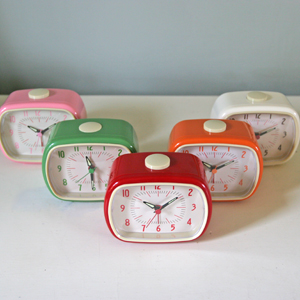

### Let's see such interesting buying trends for other countries of interest. 

In [34]:
df_2['Country'].value_counts().head()

United Kingdom    485558
Germany             9042
France              8408
EIRE                7894
Spain               2485
Name: Country, dtype: int64

## Market Basket for United Kingdom

In [60]:
basket_uk = df_2[df_2['Country'] =="United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [61]:
basket_uk['I LOVE LONDON WALL ART'].count()

17957

In [62]:
basket_uk.head(5)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### There are 18,058 trasactions recorded for the country of United Kingdom

In [63]:
basket_sets_uk = basket_uk.applymap(encode_units)
basket_sets_uk.drop('POSTAGE', inplace=True, axis=1)

Again, out of 18,058 transactions I will select only the interesting ones that qualify for further analysis.


* In this case of Uk, since we have a larger consumer data, I will take itemsets with a support of 3.0% [Purchased atleast 542 times in a total of 18,058 transactions.]

In [64]:
frequent_itemsets_uk = apriori(basket_sets_uk, min_support=0.03, use_colnames=True) 

In [65]:
frequent_itemsets_uk.count()

support     145
itemsets    145
dtype: int64

In [66]:
frequent_itemsets_uk.sort_values('support', ascending = False)

,support,itemsets
128,0.120399,[WHITE HANGING HEART T-LIGHT HOLDER]
55,0.107757,[JUMBO BAG RED RETROSPOT]
102,0.093835,[REGENCY CAKESTAND 3 TIER]
90,0.088712,[PARTY BUNTING]
73,0.077519,[LUNCH BAG RED RETROSPOT]
8,0.076349,[ASSORTED COLOUR BIRD ORNAMENT]
110,0.069110,[SET OF 3 CAKE TINS PANTRY DESIGN ]
80,0.067884,[NATURAL SLATE HEART CHALKBOARD ]
67,0.067717,[LUNCH BAG BLACK SKULL.]
37,0.064822,[HEART OF WICKER SMALL]


In [67]:
rules_uk = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=1)

In [68]:
rules_uk.sort_values('lift', ascending=False)

,antecedants,consequents,support,confidence,lift
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.039093,0.820513,15.808958
5,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.051902,0.618026,15.808958
21,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.053238,0.570084,14.582611
20,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.039093,0.776353,14.582611
3,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.050008,0.602450,14.424257
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.041766,0.721333,14.424257
6,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.053238,0.732218,14.107759
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.051902,0.751073,14.107759
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.048783,0.642694,12.409524
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.051790,0.605376,12.409524


* So for United Kingdom, the data shows that there is again a trend of purchasing different colored teacup and saucers together. * This makes sense since people would like to buy a set of different colors of teacups. 
* Moreover, British people love tea, so I would recommend to pair the different colored teacups together and bundle them. 
* As we see in the above rules, consider the RuleID 2, the support is high of 5.1% [934 times purchased together]. Also other colored teacups have good support as well as confidence. So we can assume that bundling would do good.

### I would like to change some parameter and see some more interesting rules. 

In [69]:
frequent_itemsets_uk_2 = apriori(basket_sets_uk, min_support=0.02, use_colnames=True) 

In [70]:
frequent_itemsets_uk_2.count()

support     400
itemsets    400
dtype: int64

In [71]:
rules_uk_2 = association_rules(frequent_itemsets_uk_2, metric="lift", min_threshold=1)

In [72]:
rules_uk_2.sort_values('lift', ascending=False)

,antecedants,consequents,support,confidence,lift
193,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.028345,0.722986,27.103683
192,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.026675,0.768267,27.103683
198,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.039093,0.700855,17.978926
195,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.038982,0.702857,17.978926
199,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.051902,0.527897,17.393480
194,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.030350,0.902752,17.393480
197,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.053238,0.514644,16.044216
196,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.032077,0.854167,16.044216
32,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.039093,0.820513,15.808958
33,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.051902,0.618026,15.808958


In [159]:
rules_uk_2.iloc[169]

antecedants      (RECIPE BOX PANTRY YELLOW DESIGN)
consequents    (SET OF 3 CAKE TINS PANTRY DESIGN )
support                                  0.0572046
confidence                                0.359148
lift                                       5.22602
Name: 169, dtype: object

* This is another insight from the data. We see the rule:
* [RECIPE BOX PANTRY YELLOW DESIGN] => [SET OF 3 CAKE TINS PANTRY DESIGN]
    * Support = 5.72% [1029 times purchased together]
    * Confidence = 0.35
    * Lift = 5.22 [Greater thn 1 shows statistically dependent in a positive way]

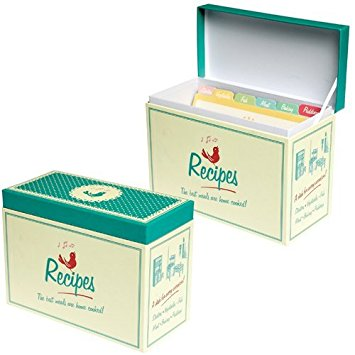, 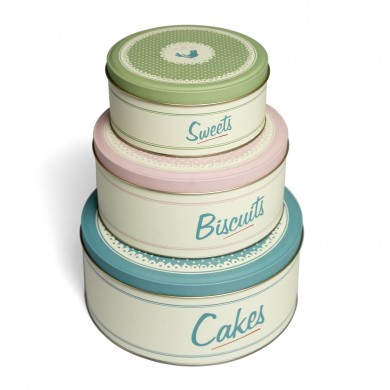

In [161]:
rules_uk_2.iloc[183]

antecedants     (WOODEN PICTURE FRAME WHITE FINISH)
consequents    (WHITE HANGING HEART T-LIGHT HOLDER)
support                                   0.0595858
confidence                                 0.375465
lift                                        3.13026
Name: 183, dtype: object

* Another insight from the data. We see the rule:
* [WOODEN PICTURE FRAME WHITE FINISH] => [WHITE HANGING HEART T-LIGHT HOLDER]
    * Support = 5.95% ~~ 6.0 % [1083 times purchased together]
    * Confidence = 0.37
    * Lift = 3.13 [Greater thn 1 shows statistically dependent in a positive way] 

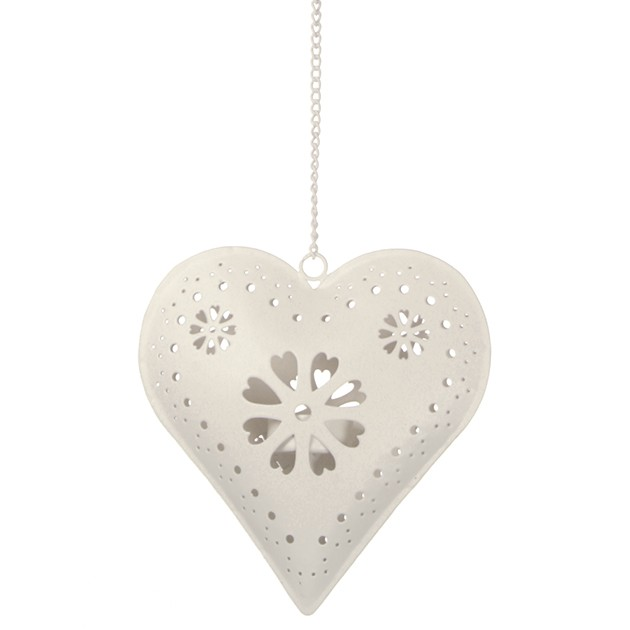, 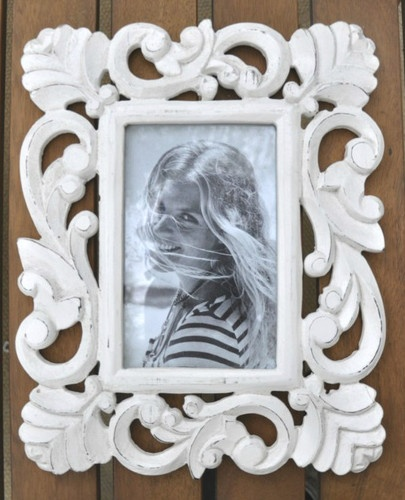

In [69]:
df_2.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

Country
United Kingdom          485526
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


### One final market basket analysis on EIRE (Ireland)

In [73]:
basket_ire = df_2[df_2['Country'] =="EIRE"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [74]:
basket_ire['SAVE THE PLANET MUG'].count()

284

There are total 284 invoices for the country of Ireland.

In [75]:
basket_sets_ire = basket_ire.applymap(encode_units)

In [76]:
frequent_itemsets_ire = apriori(basket_sets_ire, min_support=0.06, use_colnames=True) 

In [77]:
frequent_itemsets_ire.head()

,support,itemsets
0,0.084507,[60 TEATIME FAIRY CAKE CASES]
1,0.070423,[72 SWEETHEART FAIRY CAKE CASES]
2,0.070423,[ASSORTED COLOUR BIRD ORNAMENT]
3,0.105634,[BAKING SET 9 PIECE RETROSPOT ]
4,0.063380,[BINGO SET]


In [78]:
rules_ire = association_rules(frequent_itemsets_ire, metric="lift", min_threshold=1)

In [79]:
rules_ire.sort_values('lift', ascending=False)

,antecedants,consequents,support,confidence,lift
33,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE PINK),0.080986,0.782609,11.113043
32,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN ),0.070423,0.900000,11.113043
28,(REGENCY SUGAR BOWL GREEN),(REGENCY TEAPOT ROSES ),0.088028,0.720000,10.762105
29,(REGENCY TEAPOT ROSES ),(REGENCY SUGAR BOWL GREEN),0.066901,0.947368,10.762105
34,(REGENCY TEA PLATE ROSES ),(REGENCY TEA PLATE GREEN ),0.091549,0.769231,9.498328
35,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE ROSES ),0.080986,0.869565,9.498328
24,(REGENCY SUGAR BOWL GREEN),(REGENCY MILK JUG PINK ),0.088028,0.800000,9.088000
25,(REGENCY MILK JUG PINK ),(REGENCY SUGAR BOWL GREEN),0.088028,0.800000,9.088000
79,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...","(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.070423,0.950000,8.175758
82,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...","(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",0.116197,0.575758,8.175758


Two rules that are found a little interesting are:
* TEAPOT => SUGAR BOWL
    * SUPPORT = 0.065 (19 invoices contained both the items out of 288)
    * CONFIDENCE = 0.947 (94.73% chances that once TEAPOT is purchased, customers also buy SUGAR BOWL)
    * LIFT = 10.91 (Much greater than 1 indicates that the two products are correlated in a positive way and statistically dependant)
    
    
    
* MILK JUG => SUGAR BOWL 
    * SUPPORT = 0.086 ( Almost 25 invoices contained both the items out of 288.
    * CONFIDENCE = 0.80 (80.00% chances that once MILK JUG is purchased, customers also buy SUGAR BOWL)
    * LIFT = 10.91 (Much greater than 1 indicates that the two products are correlated in a positive way and statistically dependant)

### For further analysis, I would be getting some more information from the time stamp variable

In [129]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527984 entries, 9291 to 541908
Data columns (total 8 columns):
InvoiceNo      527984 non-null object
StockCode      527984 non-null object
Description    527984 non-null object
Quantity       527984 non-null int64
InvoiceDate    527984 non-null datetime64[ns]
UnitPrice      527984 non-null float64
CustomerID     396245 non-null float64
Country        527984 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.3+ MB


In [132]:
df_2['InvoiceDate'].iloc[0]

Timestamp('2011-12-09 12:50:00')

In [154]:
print ('Day is', df_2['InvoiceDate'].iloc[0].day,', month is ',df_2['InvoiceDate'].iloc[0].month, 
       ', year is', df_2['InvoiceDate'].iloc[0].day,
       ', weekday is', df_2['InvoiceDate'].iloc[0].weekday(), ', hour is', df_2['InvoiceDate'].iloc[0].hour, )

Day is 9 , month is  12 , year is 9 , weekday is 4 , hour is 12


In [80]:
df_2['Month'] = df_2['InvoiceDate'].apply(lambda x: x.month)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
df_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
9288,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,8
9289,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,8
9290,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,8
9291,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,12
9292,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,12


In [82]:
df_2['Year'] = df_2['InvoiceDate'].apply(lambda x: x.year)
df_2['Weekday'] = df_2['InvoiceDate'].apply(lambda x: x.weekday())
df_2['Hour_of_Purchase'] = df_2['InvoiceDate'].apply(lambda x: x.hour)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

#### Transforming weekdays and month from integers to a more readable format.

In [83]:
df_2['Weekday']=df_2['Weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df_2['Month']=df_2['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June', 7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### After getting some more features for our data, the final dataset is

In [89]:
df_2.drop(df_2[df_2['Description'].str.contains('Adjust')].index, inplace = True)

C:\Users\desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
df_2.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Hour_of_Purchase
9291,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,Dec,2011,Fri,12
9292,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,Dec,2011,Fri,12
9293,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,Dec,2011,Fri,12
9294,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,Dec,2011,Fri,12
9295,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Dec,2011,Fri,12
9296,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,Dec,2011,Fri,12
9297,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,Dec,2011,Fri,12
9298,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,Dec,2011,Fri,12
9299,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France,Dec,2011,Fri,12
9300,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,Dec,2011,Fri,12


### Summary (Countries)
* As we see from the below summary most of the purchasing is done in the UK, Germany, France and Ireland. I would analyze the data from those countries to understand our customers and their behavior better. 
* Moreover, I would also like to dig a bit for Spain and Netherlands to learn if we can target our customers to boost up sales.

In [183]:
df_2['Country'].value_counts().head(6)

United Kingdom    484113
Germany             8658
France              8102
EIRE                7880
Spain               2419
Netherlands         2324
Name: Country, dtype: int64

### United Kingdom

In [185]:
df_uk = df_2[df_2['Country']=='United Kingdom']

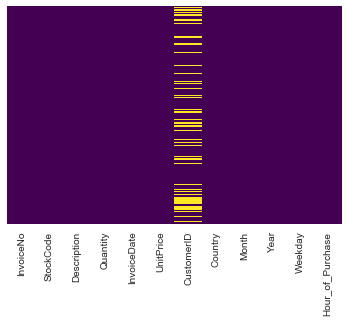

In [189]:
sns.heatmap(df_uk.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# As mentioned earlier, we might not have been able to capture the CustomerID for those who have not used a LoyaltyCard.

In [205]:
print('Total Number of purchases made:', df_uk.count()['InvoiceNo'], '\n','Total Number of Customers: ', 
      df_uk['InvoiceNo'].nunique())


Total Number of purchases made: 484113 
 Total number of customers:  18017


In [212]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Hour_of_Purchase
9306,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,Dec,2011,Fri,12
9307,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,Dec,2011,Fri,12
9308,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,Dec,2011,Fri,12
9309,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,Dec,2011,Fri,12
9310,581585,16016,LARGE CHINESE STYLE SCISSOR,10,2011-12-09 12:31:00,0.85,15804.0,United Kingdom,Dec,2011,Fri,12


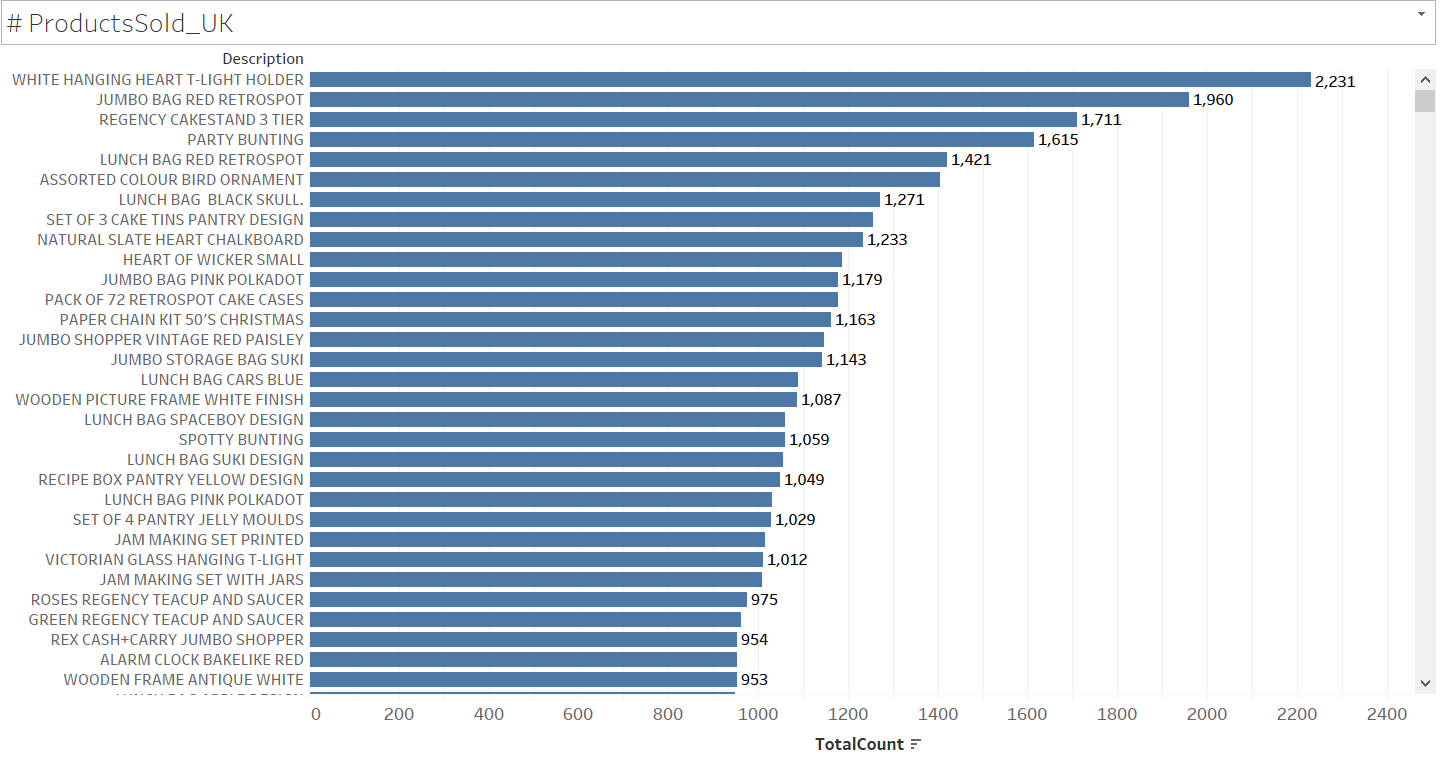

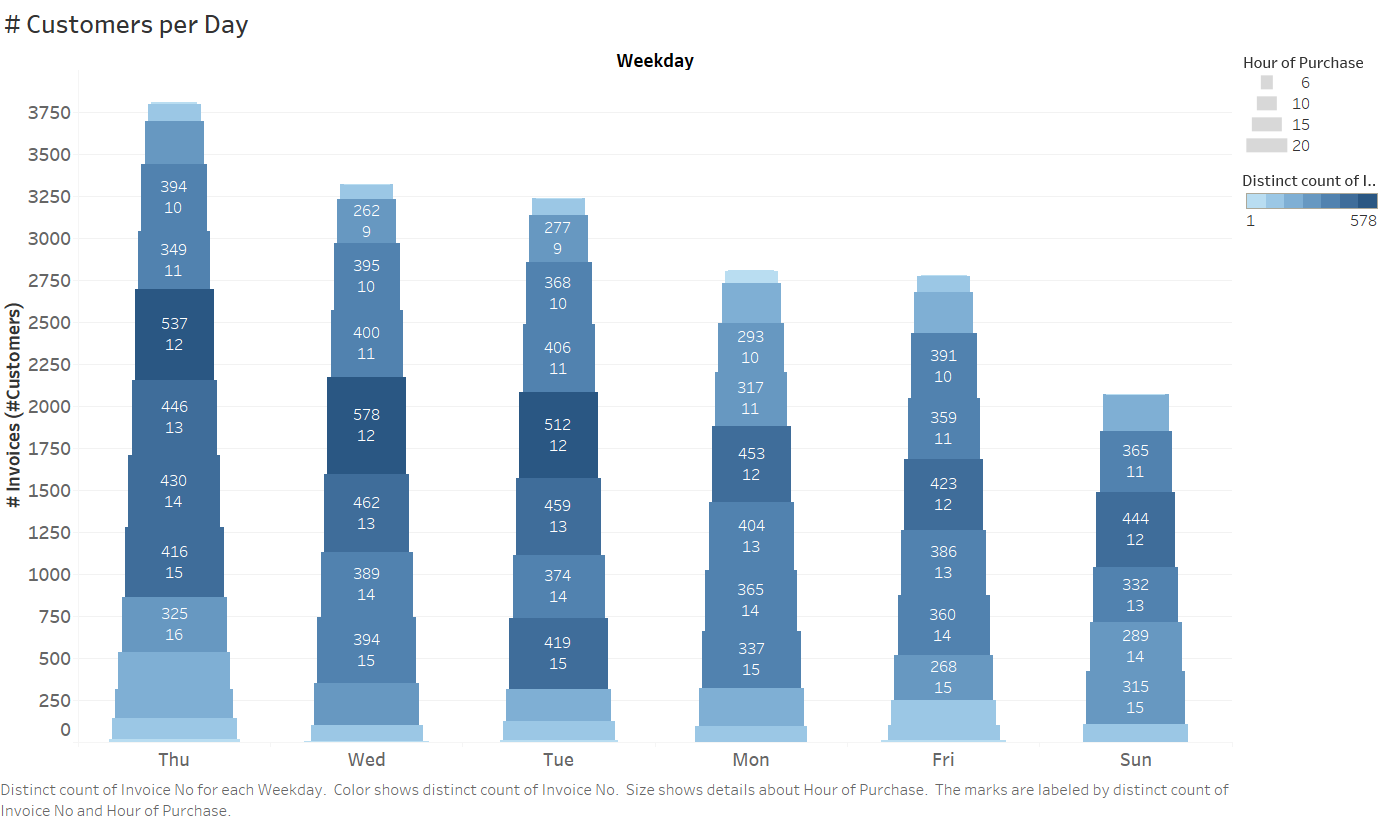

### Germany

In [221]:
df_ger = df_2[df_2['Country']=='Germany']

In [224]:
print('Total Number of purchases made:', df_ger.count()['InvoiceNo'], '\n','Total Number of Customers: ', 
      df_ger['InvoiceNo'].nunique())


Total Number of purchases made: 8658 
 Total Number of Customers:  449


In [226]:
df_ger.to_csv('Ger_db', index=False)

In [225]:
df_ger.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Weekday,Hour_of_Purchase
9394,581578,21121,SET/10 RED POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713.0,Germany,Dec,2011,Fri,12
9395,581578,21122,SET/10 PINK POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713.0,Germany,Dec,2011,Fri,12
9396,581578,21124,SET/10 BLUE POLKADOT PARTY CANDLES,24,2011-12-09 12:16:00,1.25,12713.0,Germany,Dec,2011,Fri,12
9397,581578,21497,FANCY FONTS BIRTHDAY WRAP,25,2011-12-09 12:16:00,0.42,12713.0,Germany,Dec,2011,Fri,12
9398,581578,21506,"FANCY FONT BIRTHDAY CARD,",12,2011-12-09 12:16:00,0.42,12713.0,Germany,Dec,2011,Fri,12


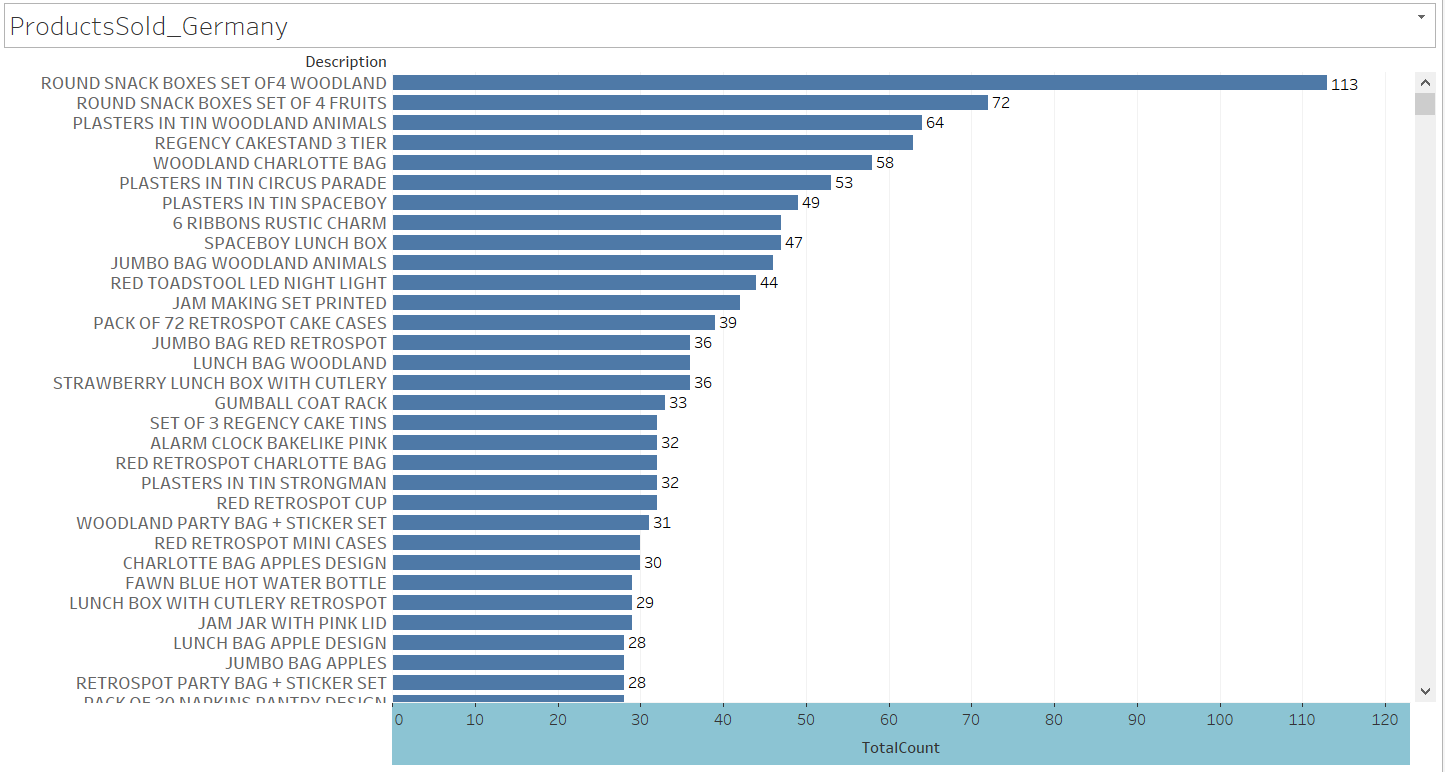

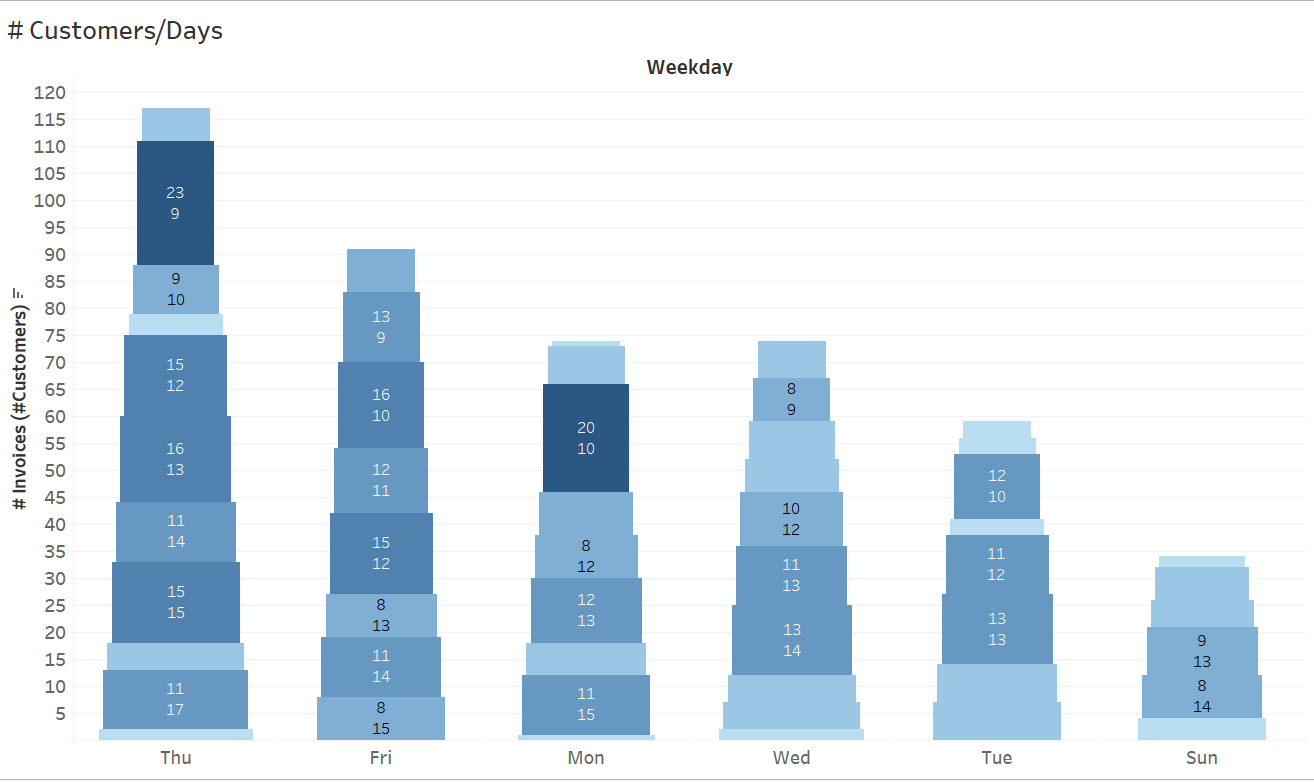

### France

In [227]:
df_fra = df_2[df_2['Country']=='France']

In [229]:
print('Total Number of purchases made:', df_fra.count()['InvoiceNo'], '\n','Total Number of Customers: ', 
      df_fra['InvoiceNo'].nunique())

Total Number of purchases made: 8102 
 Total Number of Customers:  387


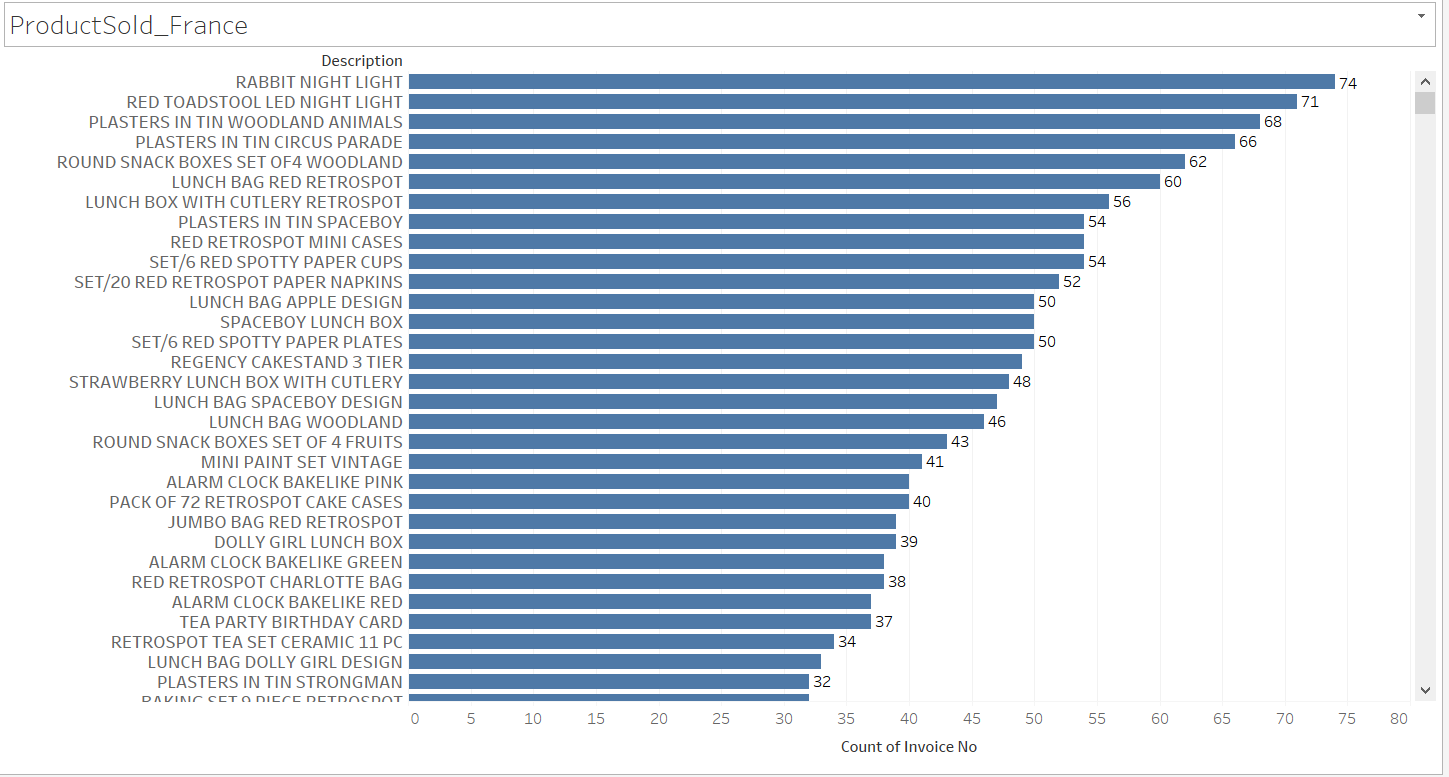

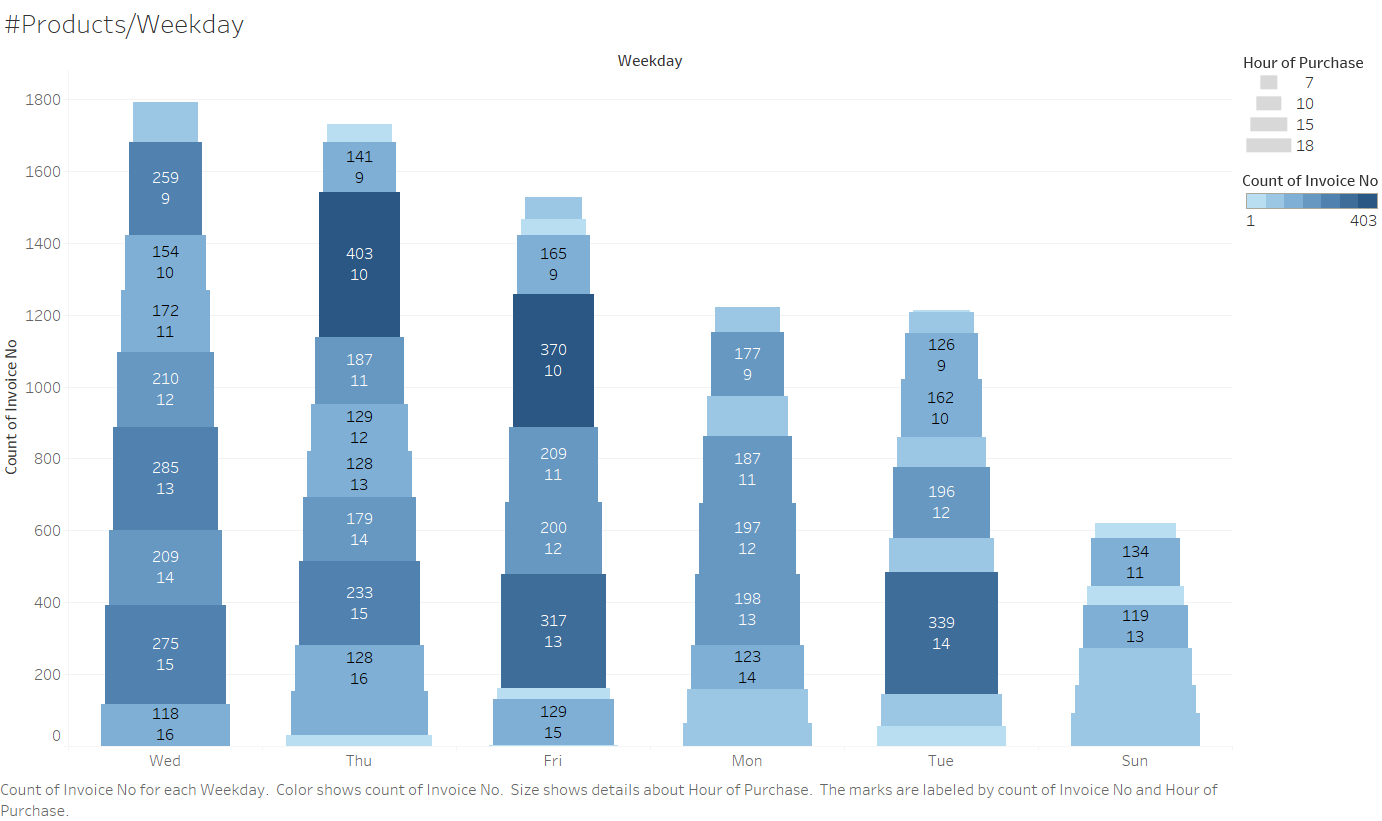